# Random Linear Classifier Algorithm

This notebook implements the random linear classifier algorithm as discussed in the machine learning lecture.

## Problem:
- Classify dogs vs cats based on two features:
  - X1: Whisker length
  - X2: Ear flappiness index
- Find the best linear classifier: θ₀ + θ₁X₁ + θ₂X₂ = 0

## Algorithm Steps:
1. Try K random choices of θ₀, θ₁, and θ₂
2. Compute training error for each hypothesis
3. Choose hypothesis with lowest error

In [1]:
# Import required libraries for our machine learning project
# numpy (np) - for mathematical operations and array handling
# matplotlib.pyplot (plt) - for creating plots and visualizations
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducible results
# This ensures that every time we run the code, we get the same 'random' numbers
# This is important for learning and debugging - makes results consistent
# The number 42 is arbitrary - any number works
np.random.seed(42)

## Data Generation

Generate synthetic data for dogs and cats:
- Dogs: Lower whisker length (mean=5), higher ear flappiness (mean=8)
- Cats: Higher whisker length (mean=8), lower ear flappiness (mean=5)

In [3]:
# Generate synthetic data for our classification problem
# We're creating artificial data that represents dogs and cats

# Generate dog data
# Dogs typically have shorter whiskers (mean=5) and higher ear flappiness (mean=8)
# np.random.normal(mean, standard_deviation, number_of_samples)
dog_whisker_length = np.random.normal(5, 1, 10)  # mean=5, std=1, size=10
dog_ear_flappiness_index = np.random.normal(8, 1, 10)  # mean=8, std=1, size=10

# Generate cat data  
# Cats typically have longer whiskers (mean=8) and lower ear flappiness (mean=5)
cat_whisker_length = np.random.normal(8, 1, 10)  # mean=8, std=1, size=10
cat_ear_flappiness_index = np.random.normal(5, 1, 10)  # mean=5, std=1, size=10

In [4]:
# Display sample data to see what we generated
# This helps us understand our data before we start the algorithm
print("Dog whisker length:", dog_whisker_length)
print("Dog ear flappiness index:", dog_ear_flappiness_index)
print("\nNotice: Dog whiskers are generally around 5, ear flappiness around 8")

Dog whisker length: [5.49671415 4.8617357  5.64768854 6.52302986 4.76584663 4.76586304
 6.57921282 5.76743473 4.53052561 5.54256004]
Dog ear flappiness index: [7.53658231 7.53427025 8.24196227 6.08671976 6.27508217 7.43771247
 6.98716888 8.31424733 7.09197592 6.5876963 ]

Notice: Dog whiskers are generally around 5, ear flappiness around 8


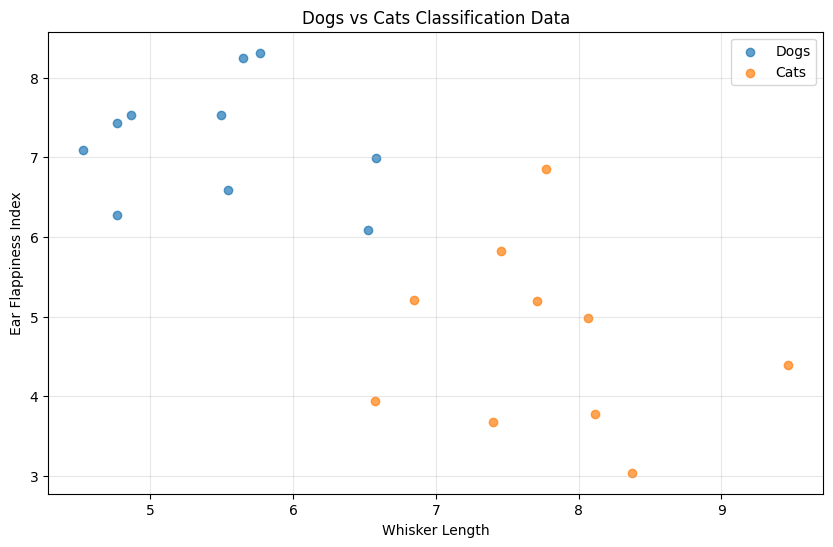

In [5]:
# Create a visualization of our data
# This scatter plot helps us see the pattern in our data
plt.figure(figsize=(10, 6))  # Set the size of our plot

# Plot dog data points in one color
plt.scatter(dog_whisker_length, dog_ear_flappiness_index, label='Dogs', alpha=0.7)
# Plot cat data points in another color
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label='Cats', alpha=0.7)

# Add labels and title to make the plot clear
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dogs vs Cats Classification Data')
plt.legend()  # Show which color represents which animal
plt.grid(True, alpha=0.3)  # Add a light grid for easier reading
plt.show()  # Display the plot

## Random Linear Classifier Algorithm Implementation

In [6]:
def compute_error(theta, theta_0, dog_data, cat_data):
    """
    Compute training error for given hypothesis parameters.
    
    This function calculates how many mistakes our classifier makes.
    
    Parameters:
    - theta: the slope parameters [θ₁, θ₂] of our line
    - theta_0: the intercept parameter θ₀ of our line
    - dog_data: array of dog data points
    - cat_data: array of cat data points
    
    For dogs: if θᵀx + θ₀ < 0, there's an error (should be +1)
    For cats: if θᵀx + θ₀ > 0, there's an error (should be -1)
    """
    error = 0  # Start with zero errors
    
    # Check errors for dog data (dogs should be classified as +1)
    # If our line equation gives a negative value for a dog, that's wrong
    for i in range(dog_data.shape[1]):
        # Calculate θ₁*x₁ + θ₂*x₂ + θ₀ for this dog
        if np.dot(theta, dog_data[:, i]) + theta_0 < 0:
            error += 1  # Count this as an error
    
    # Check errors for cat data (cats should be classified as -1)
    # If our line equation gives a positive value for a cat, that's wrong
    for i in range(cat_data.shape[1]):
        # Calculate θ₁*x₁ + θ₂*x₂ + θ₀ for this cat
        if np.dot(theta, cat_data[:, i]) + theta_0 > 0:
            error += 1  # Count this as an error
            
    return error  # Return total number of errors

In [7]:
def random_linear_classifier(dog_data, cat_data, k, d):
    """
    Random Linear Classifier Algorithm - The main algorithm!
    
    This is the heart of our machine learning algorithm. It tries many random
    lines and picks the one that makes the fewest mistakes.
    
    Parameters:
    - dog_data: data points for dogs (2D array)
    - cat_data: data points for cats (2D array)
    - k: number of random choices to try (more = better chance of good result)
    - d: number of features/dimensions (2 in our case: whisker length & ear flappiness)
    
    Returns:
    - best_theta: best θ parameters [θ₁, θ₂] that define our line slope
    - best_theta_0: best θ₀ parameter that defines our line intercept
    """
    # Initialize with worst possible values
    best_error = float('inf')  # Start with infinite error (worst possible)
    best_theta = None          # Will store the best slope parameters
    best_theta_0 = None        # Will store the best intercept parameter
    
    # Try k random choices (this is the 'random' part of the algorithm)
    for i in range(k):
        # Step 1: Randomly choose theta and theta_0
        # These define a random line: θ₁*x₁ + θ₂*x₂ + θ₀ = 0
        theta = np.random.normal(0, 1, d)    # Random slope parameters
        theta_0 = np.random.normal(0, 1)     # Random intercept parameter
        
        # Step 2: Compute error for this random choice
        current_error = compute_error(theta, theta_0, dog_data, cat_data)
        
        # Step 3: Update best if current choice is better
        if current_error < best_error:
            best_error = current_error      # Update best error
            best_theta = theta.copy()       # Save these parameters
            best_theta_0 = theta_0          # Save this parameter
    
    # Return the best line we found after trying k random lines
    return best_theta, best_theta_0

## Prepare Data and Run Algorithm

In [8]:
# Prepare data in the format our algorithm expects
# np.vstack stacks arrays vertically to create a 2D array
# Each column will be one data point [whisker_length, ear_flappiness]
dog_data = np.vstack([dog_whisker_length, dog_ear_flappiness_index])
cat_data = np.vstack([cat_whisker_length, cat_ear_flappiness_index])

# Let's check the shape of our data to make sure it's correct
print("Dog data shape:", dog_data.shape)  # Should be (2, 10) = 2 features, 10 dogs
print("Cat data shape:", cat_data.shape)  # Should be (2, 10) = 2 features, 10 cats
print("\nSample dog data (first few columns):")
print(dog_data[:, :3])  # Show first 3 dogs
print("\nEach column represents one dog: [whisker_length, ear_flappiness]")

Dog data shape: (2, 10)
Cat data shape: (2, 10)

Sample dog data (first few columns):
[[5.49671415 4.8617357  5.64768854]
 [7.53658231 7.53427025 8.24196227]]

Each column represents one dog: [whisker_length, ear_flappiness]


In [9]:
# Now let's run our machine learning algorithm!
# These are the hyperparameters (settings) for our algorithm
K = 100  # Number of random lines to try (more = better but slower)
D = 2    # Number of features (whisker length + ear flappiness = 2)

print(f"Running algorithm: trying {K} random lines to find the best one...")
best_theta, best_theta_0 = random_linear_classifier(dog_data, cat_data, K, D)

print("\n🎉 Algorithm finished! Here's the best line we found:")
print(f"Best theta (θ₁, θ₂): {best_theta}")
print(f"Best theta_0 (θ₀): {best_theta_0}")
print(f"\nThis means our decision boundary is: {best_theta[0]:.3f}*x₁ + {best_theta[1]:.3f}*x₂ + {best_theta_0:.3f} = 0")

Running algorithm: trying 100 random lines to find the best one...

🎉 Algorithm finished! Here's the best line we found:
Best theta (θ₁, θ₂): [-0.676922    0.61167629]
Best theta_0 (θ₀): 1.030999522495951

This means our decision boundary is: -0.677*x₁ + 0.612*x₂ + 1.031 = 0


## Visualize Results

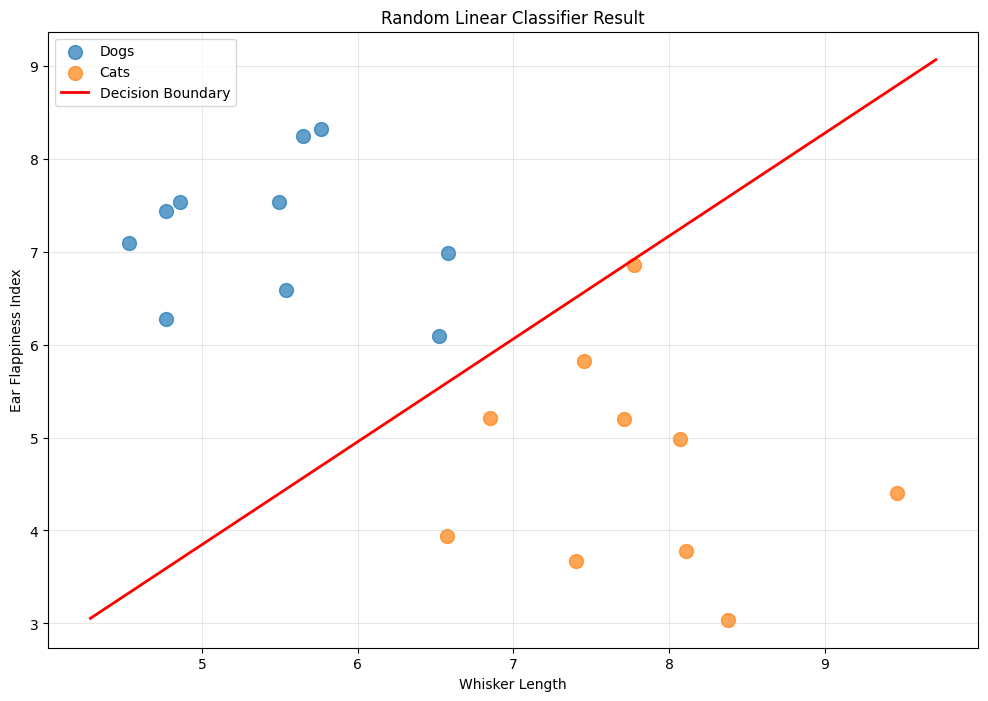

Decision boundary equation: -0.677x₁ + 0.612x₂ + 1.031 = 0


In [10]:
# Plot data with decision boundary
plt.figure(figsize=(12, 8))

# Plot data points
plt.scatter(dog_whisker_length, dog_ear_flappiness_index, label='Dogs', alpha=0.7, s=100)
plt.scatter(cat_whisker_length, cat_ear_flappiness_index, label='Cats', alpha=0.7, s=100)

# Plot decision boundary
# Decision boundary: θ₁x₁ + θ₂x₂ + θ₀ = 0
# Solving for x₂: x₂ = -(θ₁x₁ + θ₀)/θ₂
x_min, x_max = plt.xlim()
x_line = np.linspace(x_min, x_max, 100)
y_line = -(best_theta[0] * x_line + best_theta_0) / best_theta[1]

plt.plot(x_line, y_line, 'r-', linewidth=2, label='Decision Boundary')

plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Random Linear Classifier Result')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Display the equation
print(f"Decision boundary equation: {best_theta[0]:.3f}x₁ + {best_theta[1]:.3f}x₂ + {best_theta_0:.3f} = 0")

In [11]:
# Calculate and display final training error
final_error = compute_error(best_theta, best_theta_0, dog_data, cat_data)
total_points = dog_data.shape[1] + cat_data.shape[1]
accuracy = (total_points - final_error) / total_points * 100

print(f"Final training error: {final_error} out of {total_points} points")
print(f"Training accuracy: {accuracy:.1f}%")

Final training error: 0 out of 20 points
Training accuracy: 100.0%
